In [79]:
#from BAG import *
from sklearn.feature_extraction.text import CountVectorizer
from tqdm import tqdm
import numpy as np
import pandas as pd
import umap.umap_ as umap
import matplotlib.pyplot as plt

def umap_plot(b):
    embeddings = umap.UMAP(spread=3,min_dist=0.5,a=1, b=0.9).fit(b)
    X_scalled = embeddings.transform(b)
    plt.rcParams["figure.figsize"] = (20, 10)
    plt.scatter(X_scalled[:, 0], X_scalled[:, 1], s=0.5);

def get_words(text):
    return [word for word in text.split() if not word.isnumeric()]

def concatenate(test):
    content = ""
    temp=[]
    for i in test:
        temp.append(i["code"])
    for j in temp:
        for i in j.split("\n"):
            if i.strip() != "" and i.strip() != " ":
                #print(i)
                #i = i.removesuffix(" _")
                content += i.lstrip() + "\n"
    return content

def speed(file):
    data = pd.read_parquet(file, engine='pyarrow')
    return data


def extract_data(data):
    print("Extracting...")
    result=[]
    #data = pd.read_parquet(file, engine='pyarrow')
    c=0
    m=0
    for i in tqdm(range(len(data.iloc[: , -1]))):
        m+=1
        if data.iloc[:, 1][i] == "1" and data.iloc[:,-1][i].all != None :
            result.append(( get_words(concatenate(data.iloc[:,-1][i])) ))     
            c+=1
    print("Number of files: ", m)
    print("Extracted: ", c)
    return  result


def writefile(data, file):
    return 1


def Bagofword(fo):
    my_stop_words = [ "|", "?"]
    vectorizer = CountVectorizer(
        stop_words=my_stop_words, min_df=0.03, max_df=0.9)
    bag = vectorizer.fit_transform(fo)
    for i in range(len(vectorizer.get_feature_names())):
        print(vectorizer.get_feature_names()[i])
    return bag.toarray()


In [2]:
temp= speed("malware.parquet")

In [19]:
data = extract_data(temp)

Extracting...


100%|██████████| 90219/90219 [00:25<00:00, 3590.87it/s]


Number of files:  90219
Extracted:  56436


In [80]:
code = []
result = extract_data(temp)

Extracting...


100%|██████████| 90219/90219 [01:02<00:00, 1443.80it/s]

Number of files:  90219
Extracted:  56436


In [81]:
print(result[60])


['Attribute', 'VB_Name', '=', '"quiatciygaes"', 'Attribute', 'VB_Base', '=', '"1Normal.ThisDocument"', 'Attribute', 'VB_GlobalNameSpace', '=', 'False', 'Attribute', 'VB_Creatable', '=', 'False', 'Attribute', 'VB_PredeclaredId', '=', 'True', 'Attribute', 'VB_Exposed', '=', 'True', 'Attribute', 'VB_TemplateDerived', '=', 'True', 'Attribute', 'VB_Customizable', '=', 'True', 'Private', 'Sub', '_', 'Document_open()', 'noozhoutdeup.doaqutaivsaut', 'End', 'Sub', 'Attribute', 'VB_Name', '=', '"noozhoutdeup"', 'Attribute', 'VB_Base', '=', '"0{4EAB76E3-F3FA-467E-B47D-64E1C0858038}{D44A63A3-578C-4723-8B0C-6896DD1BEDB9}"', 'Attribute', 'VB_GlobalNameSpace', '=', 'False', 'Attribute', 'VB_Creatable', '=', 'False', 'Attribute', 'VB_PredeclaredId', '=', 'True', 'Attribute', 'VB_Exposed', '=', 'False', 'Attribute', 'VB_TemplateDerived', '=', 'False', 'Attribute', 'VB_Customizable', '=', 'False', 'Function', 'doaqutaivsaut()', 'setper', '=', 'Chr(noozhoutdeup.Zoom', '+', '((60', '+', '60)', '/', '8))',

In [74]:
#for i in range(len(result)):
#    result[i] = ''.join([i for i in result[i] if not i.isdigit()])
b= Bagofword(result)


c:\Users\moham\OneDrive\Desktop\malware\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


00
0000
000000000046
00020819
00020820
00020906
0002e157
01
02
03
04
05
08002b3371b5
10
100
1000
10000
101
102
103
104
105
106
1068
107
108
109
11
110
111
112
113
114
115
116
117
118
119
12
120
121
122
123
124
125
126
127
128
129
13
130
132
134
135
138
14
140
143
148
15
150
151
152
153
155
158
159
16
160
161
168
17
178
18
188
189
19
192
193
194
196
199
1normal
20
200
201
207
209
21
210
22
226
23
232
234
24
244
25
255
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
a0fa
a1
a2
a3
a4
a5
a6
a7
a738
aa
access
accessvbom
activecell
activedocument
activesheet
activewindow
activeworkbook
ad
add
addfromguid
addfromstring
alert
alias
all
alternativetext
am
an
and
any
appactivate
application
are
arr
array
as
asc
at
atendofstream
atn
attachments
attrib
author
auto_open
autoopen
b2
bas
be
before
binary
body
bold
boolean
by
byre

In [75]:
print(len(b[1]))

649


c:\Users\moham\OneDrive\Desktop\malware\env\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


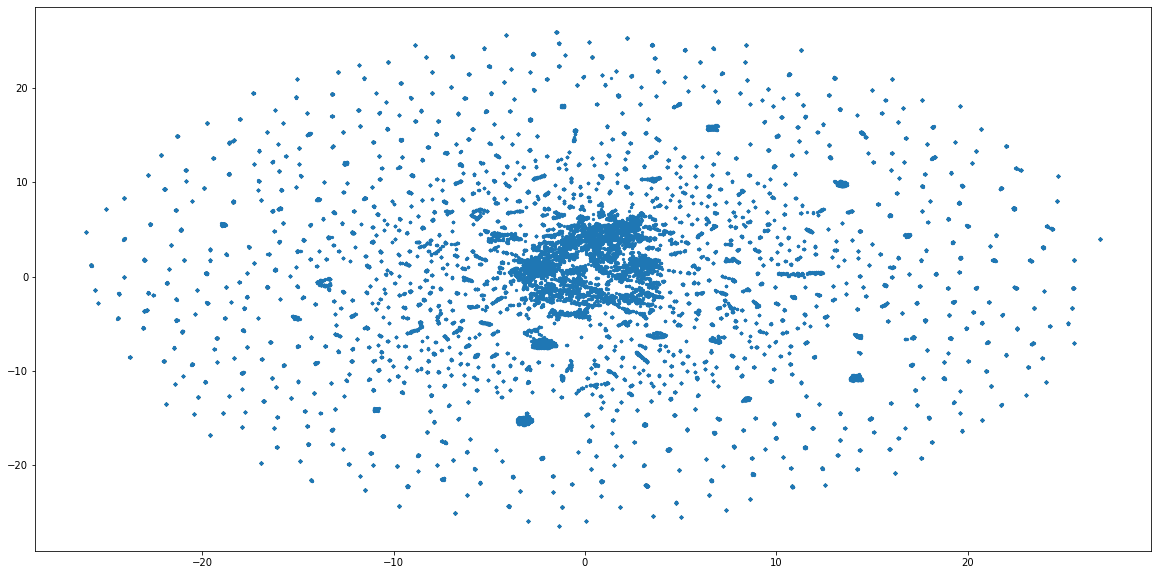

In [51]:
umap_plot(b)